In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
accident = pd.read_csv('C:/Users/Clark/OneDrive/Desktop/ediwow/New folder/accident_data.csv')

In [38]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [39]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [40]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [41]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [42]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [43]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [44]:
accident['Accident Date']

0           5/6/2019
1           2/7/2019
2         26-08-2019
3         16-08-2019
4           3/9/2019
             ...    
660674    18-02-2022
660675    21-02-2022
660676    23-02-2022
660677    23-02-2022
660678    28-02-2022
Name: Accident Date, Length: 660679, dtype: object

In [45]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident.dtypes
#remove spaces
accident['Accident Date'] = accident['Accident Date'].str.strip()
#replace / with -
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')


In [46]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [47]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [48]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [49]:
accident['Accident_Severity']=accident['Accident_Severity'].astype('category')

In [50]:
accident['Light_Conditions']=accident['Light_Conditions'].astype('category')

In [51]:
accident['District Area']=accident['District Area'].astype('category')

In [52]:
accident['Number_of_Casualties']=accident['Number_of_Casualties'].astype('category')

In [53]:
accident['Number_of_Vehicles']=accident['Number_of_Vehicles'].astype('category')

In [54]:
accident['Road_Surface_Conditions']=accident['Road_Surface_Conditions'].astype('category')

In [55]:
accident['Road_Type']=accident['Road_Type'].astype('category')

In [56]:
accident['Urban_or_Rural_Area']=accident['Urban_or_Rural_Area'].astype('category')

In [57]:
accident['Weather_Conditions']=accident['Weather_Conditions'].astype('category')

In [58]:
accident['Vehicle_Type']=accident['Vehicle_Type'].astype('category')

In [59]:
accident['Latitude']=accident['Latitude'].astype('category')

In [60]:
accident['Longitude']=accident['Longitude'].astype('category')

In [61]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties             category
Number_of_Vehicles               category
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [62]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [63]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  category      
 8   Number_of_Vehicles       660679 non-null  category      
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [64]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

<h1>Insight no.1</h1>
<h3>There were more accidents in 2019, followed by 2020, and based on the results, the number of accidents has been decreasing each year.
</h3>

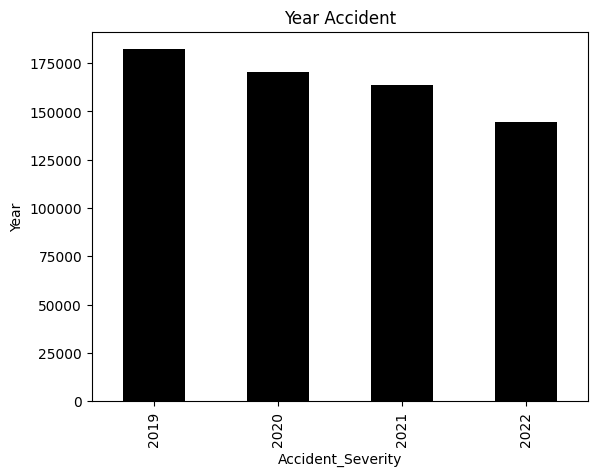

In [65]:
accidents_per_year = accident.groupby('Year')['Accident_Severity'].count().sort_index()

accidents_per_year.plot(kind='bar' , color='black')
plt.title('Year Accident')
plt.ylabel('Year')
plt.xlabel('Accident_Severity')
plt.show()

                             

<h1>Insight no.2</h1>

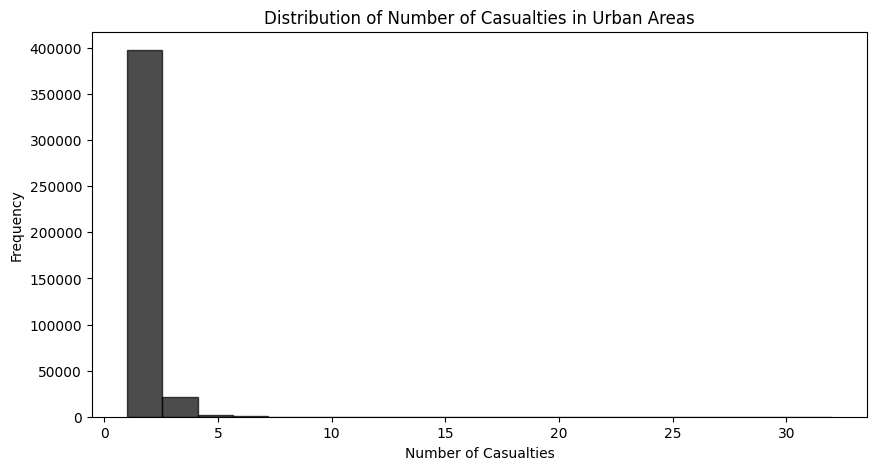

In [66]:
urban_casualties = accident[accident['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']

plt.figure(figsize=(10, 5))
plt.hist(urban_casualties, bins=20, color='black', edgecolor='black', alpha=0.7)

plt.title('Distribution of Number of Casualties in Urban Areas')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')

plt.show()

<h1>Insight no.3</h1>
<h3>Birmingham have the highest number of fatal accidents with 105 reported followed by Leeds with 93 reported then Highland with 88 reported</h3>

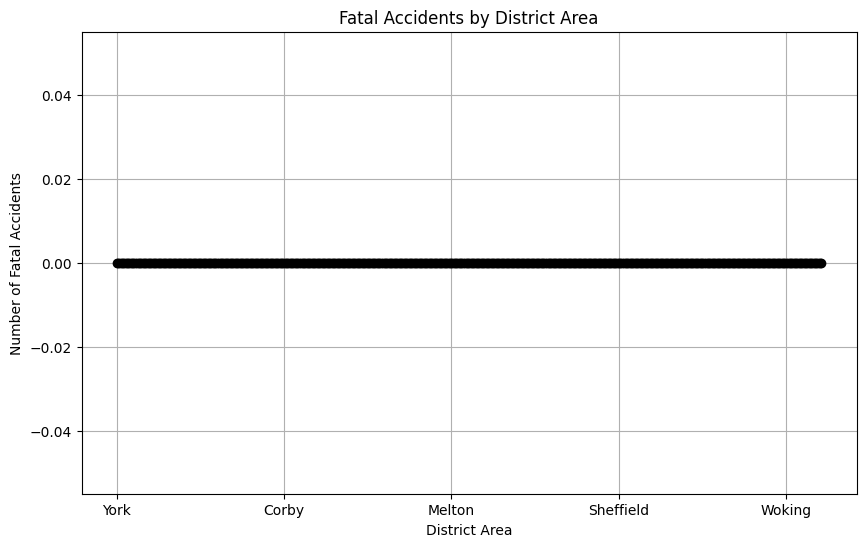

In [67]:
severity_district = accident[accident['Accident_Severity'] == 'fatal']['District Area'].value_counts()

plt.figure(figsize=(10, 6))
severity_district.plot(kind='line', marker='o', color='black') 
plt.title('Fatal Accidents by District Area')
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('District Area')
plt.grid(True)
plt.show()


<h1>Insight no.4</h1>
<h3>Saturday has the highest number of accidents (43,164), followed by Wednesday (40,037) and Friday (39,822)</h3>

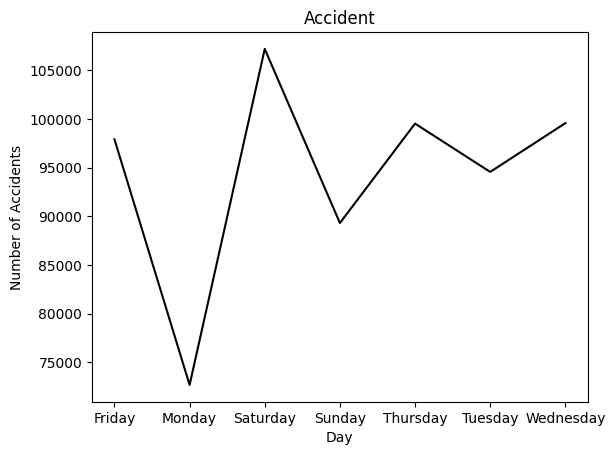

In [68]:
accident_day = accident['Accident Date'].dt.day_name().value_counts().sort_index()
accident_day.plot(kind='line', color='black')
plt.title('Accident')
plt.ylabel('Number of Accidents')
plt.xlabel('Day')
plt.show()

<h1>Insight no.5</h1>
<h3>The proportion of accidents happening on weekdays is 28.27%</h3>

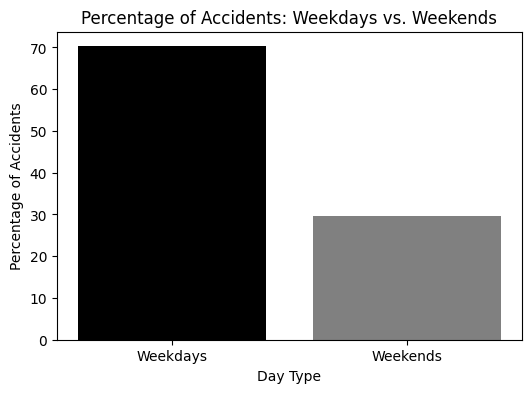

In [69]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])

weekdays = (accident['Accident Date'].dt.dayofweek < 5).mean() * 100  
weekends = (accident['Accident Date'].dt.dayofweek >= 5).mean() * 100  

accident_percentages = {'Weekdays': weekdays, 'Weekends': weekends}


plt.figure(figsize=(6, 4))
plt.bar(accident_percentages.keys(), accident_percentages.values(), color=['black', 'gray'])


plt.title('Percentage of Accidents: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Percentage of Accidents')
plt.show()

<h1>Insight no.6</h1>
<h3>Fatal Accidents Occur Most on Dry Roads</h3>

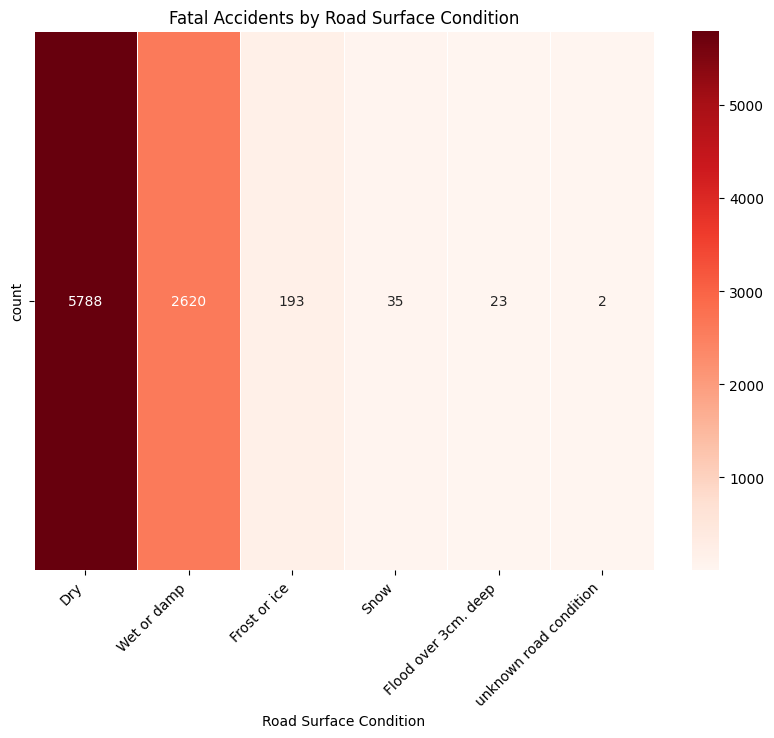

In [70]:

# Kunin ang count ng Fatal Accidents by Road Surface Condition
severity_rtype = accident[accident['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()

# Convert to DataFrame at i-reshape ito para maging heatmap-friendly
severity_rtype_df = pd.DataFrame(severity_rtype).T  # Transpose para maging row-based

# Plot Heatmap
plt.figure(figsize=(10, 7))  # Adjust height para hindi masyadong stretched
sns.heatmap(severity_rtype_df, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

plt.title('Fatal Accidents by Road Surface Condition')
plt.xlabel('Road Surface Condition')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

<h1>Insight no.7</h1>
<h3>Motorcycles and bicycles tend to have a higher proportion of serious or fatal accidents due to lack of external protection and higher vulnerability in crashes.
</h3>

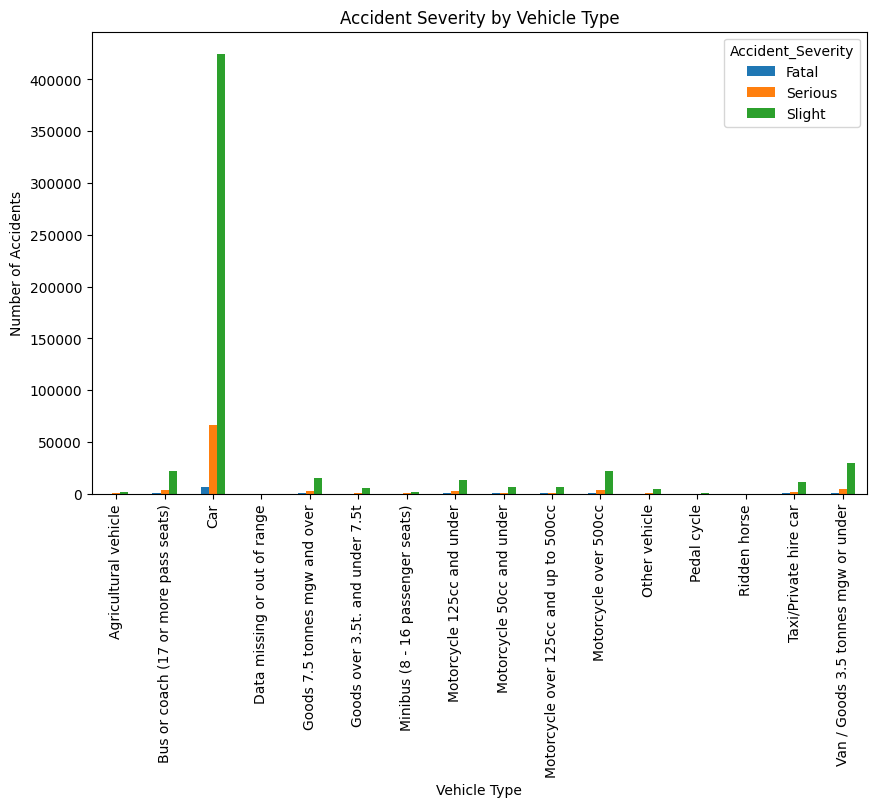

In [71]:
severity_by_vehicle = accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts().unstack()

severity_by_vehicle.plot(kind='bar', figsize=(10, 6))

plt.title("Accident Severity by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")

plt.show()

<h1>Insight no.8</h1>
<h3>Accidents on wet or icy roads may be more severe because vehicles take longer to stop and lose control more easily.</h3>

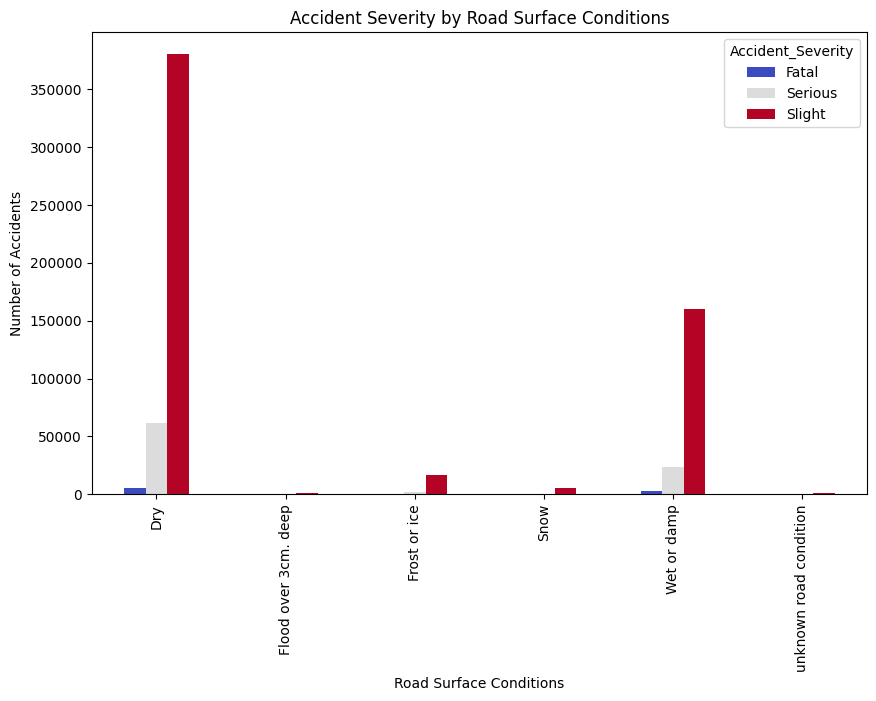

In [72]:
severity_by_surface = accident.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack()

severity_by_surface.plot(kind='bar', figsize=(10, 6), colormap="coolwarm")

plt.title("Accident Severity by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Accidents")

plt.show()

<h1>Insight No.9</h1>
<h3>Most accidents occur in "Fine no high winds" conditions with 441,739 slight, 72,046 serious, 7,100 fatal accidents reported</h3>

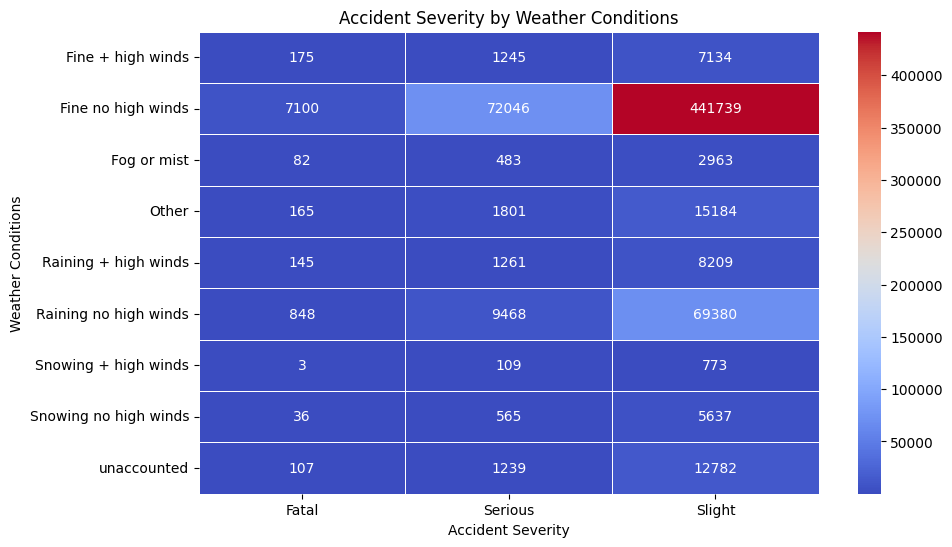

In [73]:
severity_weather = accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(severity_weather, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Accident Severity")
plt.ylabel("Weather Conditions")

plt.show()

<h1>Insight no.10</h1>
<h3>Motorcycles and bicycles may peak in summer (June-August) due to good weather.
Heavy vehicles (trucks, buses) may have steady numbers year-round because of commercial activity.
Private cars may increase during holidays (December, July, August) due to vacation trips.</h3>

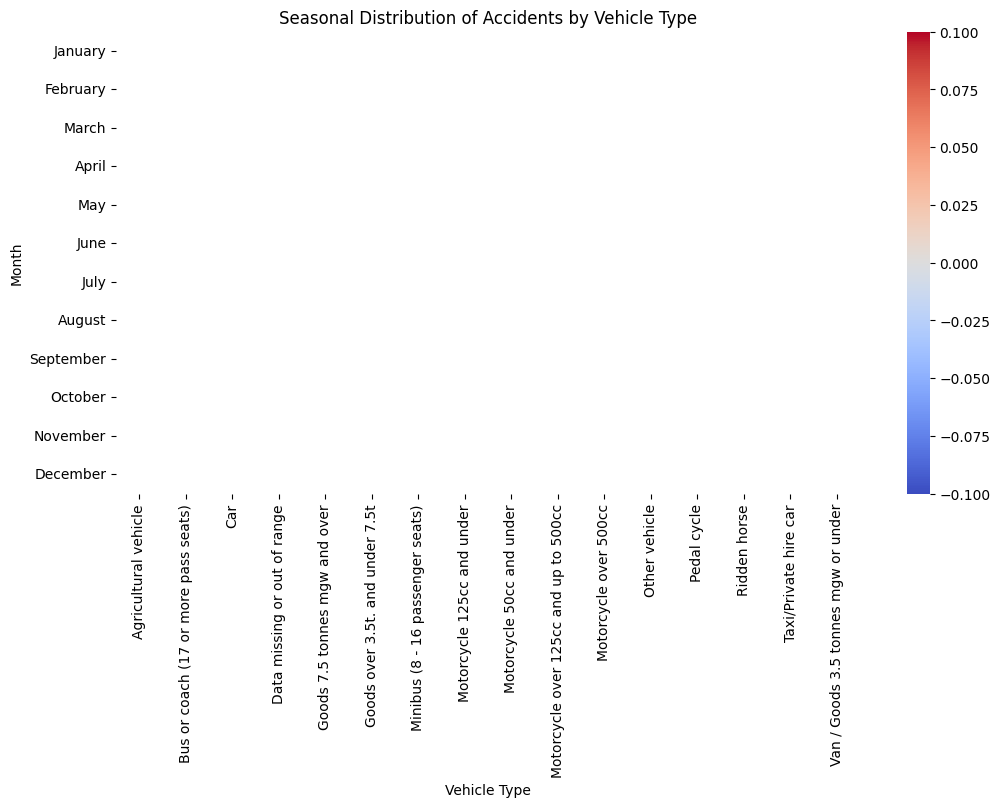

In [74]:
vehicle_seasonal = accident.groupby(['Month', 'Vehicle_Type']).size().unstack().fillna(0)

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

vehicle_seasonal = vehicle_seasonal.reindex(month_order)

plt.figure(figsize=(12, 6))
sns.heatmap(vehicle_seasonal, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Seasonal Distribution of Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Month")

plt.show()

<h1>Insight no.11</h1>
<h3>Motorcycles and bicycles may have fewer night-time incidents, as riders avoid poor visibility conditions.
Taxis and private hire cars may have higher numbers at night, reflecting nightlife travel.
</h3>

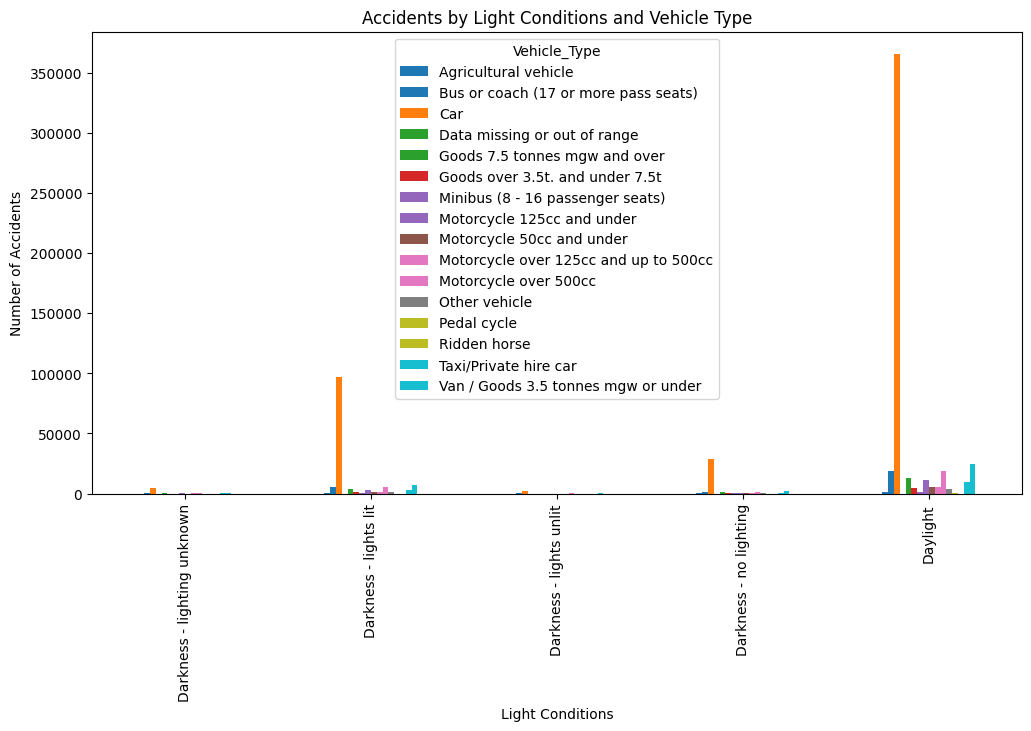

In [75]:
light_vehicle = accident.groupby(['Light_Conditions', 'Vehicle_Type']).size().unstack()

light_vehicle.plot(kind='bar', figsize=(12,6), colormap='tab10')

plt.title("Accidents by Light Conditions and Vehicle Type")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")

plt.show()


<h3>Single carriageways have the highest number of accidents with 415,557 slight, 70,059 serious, and 6,527 fatal accidents reported</h3>

<h1>Insight no.12</h1>
<h3>The highest accident count (45) occurs at latitude 52.949719, longitude -0.977611</h3>

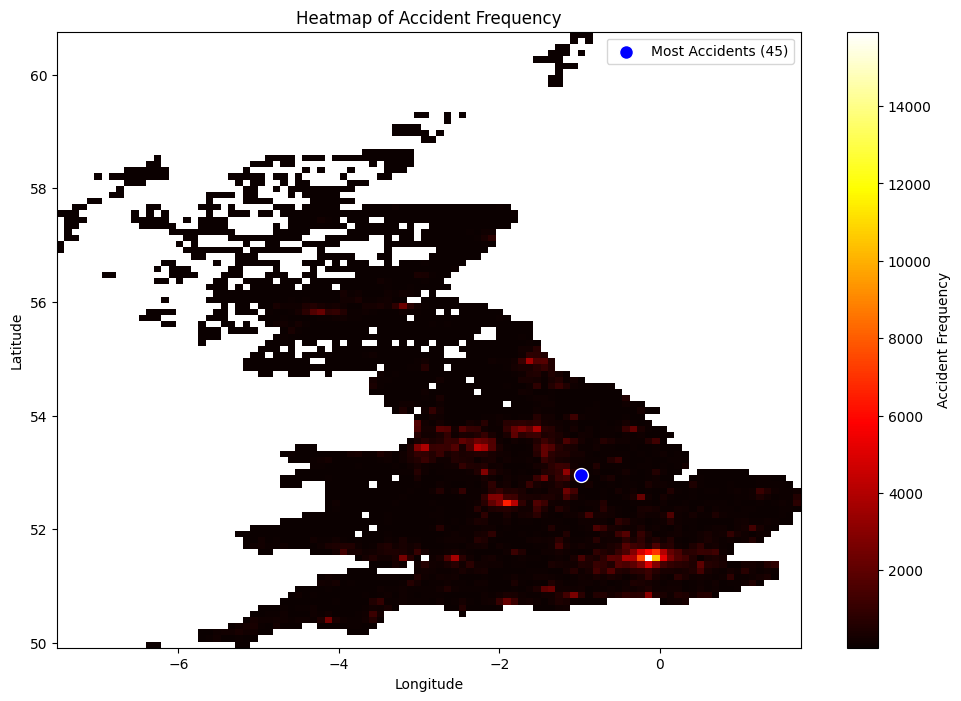

In [76]:
latitudes = accident['Latitude'].values
longitudes = accident['Longitude'].values

high_acc_lat, high_acc_lon = 52.949719, -0.977611

plt.figure(figsize=(12, 8))
plt.hist2d(longitudes, latitudes, bins=(100, 100), cmap='hot', cmin=1)
plt.colorbar(label='Accident Frequency')

plt.scatter(high_acc_lon, high_acc_lat, color='blue', edgecolors='white', s=100, label="Most Accidents (45)")
plt.legend()

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Accident Frequency')

plt.show()